## Grouping engagement by thread

In [54]:
import pandas as pd

datas = pd.read_csv('data/fifteen_twenty.csv', encoding='ISO-8859-1')
datas.head()

,id,thread_number,timestamp,text,retweets,likes,replies
0,998968203681427458,Thread 1,1527007554,1) WE HAVE A BREAKING FREAKING STORY HERE\r\r\...,335,679,94
1,998968303136727041,Thread 1,1527007578,2) I AM SO EXCITE I MIGHT NOT EVEN SWEAR OR GO...,60,294,13
2,998968508225589249,Thread 1,1527007626,"3) CNN, AP, and MSNBC....",120,291,5
3,998968614509273088,Thread 1,1527007652,4) HAVE JUST BEEN RAIDED BY THE FCC https://t....,174,465,39
4,998969018781523975,Thread 1,1527007748,5) My one source inside one of these networks ...,242,558,18


In [55]:
grouped_by_thread = datas.groupby(['thread_number'])

retweets = {}
favs = {}
replies = {}

# retweets
for thread, data in dict(list(grouped_by_thread)).items():
    retweets[thread] = list(data['retweets'])

retweets_by_thread = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in retweets.items() ]))

# favs
for thread, data in dict(list(grouped_by_thread)).items():
    favs[thread] = list(data['likes'])

favs_by_thread = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in favs.items() ]))

# replies
for thread, data in dict(list(grouped_by_thread)).items():
    replies[thread] = list(data['replies'])

replies_by_thread = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in replies.items() ]))

retweets_by_thread.head()

,Thread 1,Thread 10,Thread 11,Thread 12,Thread 13,Thread 14,Thread 15,Thread 16,Thread 17,Thread 18,...,Thread 90,Thread 91,Thread 92,Thread 93,Thread 94,Thread 95,Thread 96,Thread 97,Thread 98,Thread 99
0,335.0,33,386,52.0,10.0,1.0,75.0,180.0,403,6.0,...,1625.0,25.0,145,132.0,407.0,71,284.0,136.0,143.0,65.0
1,60.0,6,65,17.0,0.0,0.0,1.0,8.0,124,1.0,...,89.0,845.0,0,2.0,118.0,10,140.0,23.0,19.0,12.0
2,120.0,5,96,13.0,0.0,0.0,2.0,6.0,179,0.0,...,82.0,13.0,0,7.0,212.0,15,82.0,12.0,13.0,8.0
3,174.0,3,100,15.0,0.0,0.0,3.0,7.0,95,1.0,...,89.0,3.0,0,4.0,95.0,33,71.0,15.0,12.0,18.0
4,242.0,3,73,11.0,0.0,0.0,3.0,6.0,104,1.0,...,90.0,4.0,0,3.0,244.0,26,84.0,32.0,10.0,32.0


## Average size of a thread

In [4]:
grouped_by_thread.size().mean()

27.9

## Visualizing average retweets in Twitter threads

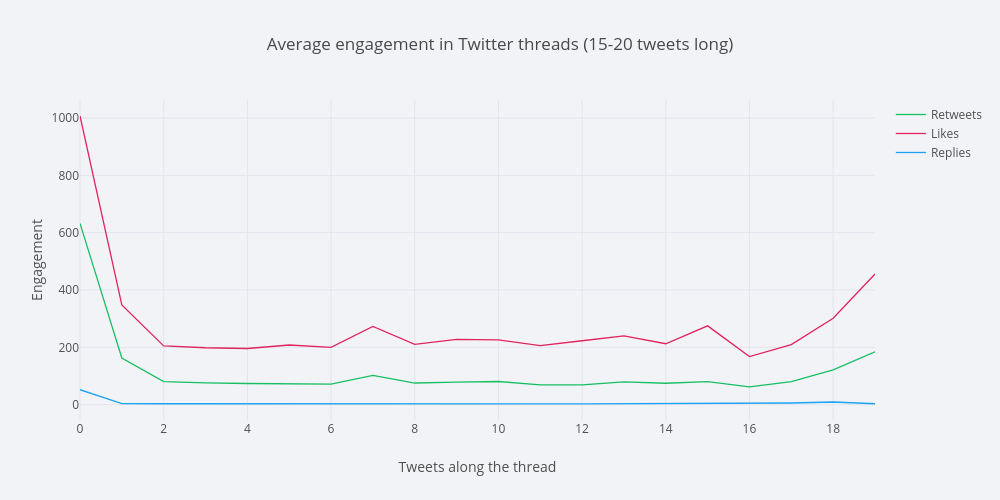

In [57]:
import cufflinks as cf
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

avg = pd.DataFrame()
avg['Retweets'] = retweets_by_thread.mean(axis=1)
avg['Likes'] = favs_by_thread.mean(axis=1)
avg['Replies'] = replies_by_thread.mean(axis=1)

fig = avg.iplot(kind='lines', asImage=True, title='Average engagement in Twitter threads (15-20 tweets long)', 
                xTitle='Tweets along the thread', yTitle='Engagement',
                theme='polar', colors={'Retweets': '17bf63', 'Likes': 'e0245e', 'Replies': '1da1f2', 'Mean': '000000'})


In [6]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Span

output_notebook()

Loading BokehJS ...

In [23]:

p = figure(plot_width=1000, plot_height=500, title='Average engagement in Twitter threads (5-10 length)', background_fill_color="#f2f3f7", y_axis_label='Engagement', x_axis_label='Tweets along the thread')

# add a line renderer
p.line(list(range(1,31)), avg['Retweets'].values,line_color='#17bf63', legend='Retweets')
p.line(list(range(1,31)), avg['Likes'].values, line_color='#e0245e', legend='Likes')
p.line(list(range(1,31)), avg['Replies'].values, line_color='#1da1f2', legend='Replies')

average_length = Span(location=grouped_by_thread.size().mean(), dimension='height', line_color='black', line_dash='dashed', name ='Average')
p.add_layout(average_length)

show(p) # show the results